In [1]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

In [3]:
df=pd.DataFrame(X)
df['class']=y
df["class"]=(df["class"]=='g').astype(int)
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\ryanf\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [4]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [5]:
from sklearn.preprocessing import StandardScaler

def scale_dataset(df, oversample=False):
  X=df[df.columns[:-1]].values
  y=df[df.columns[-1]].values
  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X, np.reshape(y, (-1,1))))
  return data

In [6]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
2560,88.4059,27.0876,3.4214,0.1917,0.0998,-112.6780,63.3567,-18.6340,3.6170,308.5130,1
5117,37.1197,15.5082,2.6454,0.3846,0.2432,-3.2414,-29.3464,16.2343,9.8290,155.9150,1
7759,73.0376,22.2678,3.4429,0.1745,0.0932,72.6734,63.8847,11.8337,2.1300,282.8130,1
16350,122.1989,32.9978,3.0650,0.3466,0.2145,124.7208,91.4170,17.6657,43.3185,176.6684,0
2937,21.9503,16.3082,2.5391,0.4884,0.2876,2.8914,17.6252,15.4778,18.1200,150.5200,1
...,...,...,...,...,...,...,...,...,...,...,...
3164,19.1054,10.9195,2.3139,0.7039,0.4102,14.5035,18.1433,-9.2446,27.6620,234.0900,1
9930,50.8299,11.1603,2.6335,0.5047,0.2895,-73.0126,37.7748,4.0351,2.4634,268.0360,1
11059,35.6385,15.6583,2.8722,0.3195,0.2007,29.2838,24.4401,5.8585,20.9240,60.4180,1
6583,29.5570,18.2513,2.7063,0.3166,0.1642,35.0348,16.1130,10.5996,23.2507,159.4050,1


In [7]:
#creating oversampled dataset
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train[train.columns[:-1]], train[train.columns[-1]])

In [8]:
train_data = scale_dataset(train, oversample=True) #only trais data is oversampled
valid_data = scale_dataset(valid, oversample=False)
test_data = scale_dataset(test, oversample=False)

# Extracting X and y from the returned data
x_train = train_data[:, :-1]  # Select all columns except the last one
y_train = train_data[:, -1]   # Select only the last column
x_valid = valid_data[:, :-1]
y_valid = valid_data[:, -1]
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

In [9]:
#trainind with knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred = knn_model.predict(x_test)
y_pred

array([1., 1., 1., ..., 0., 1., 1.])

In [11]:
# training with naive bayes model
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model=nb_model.fit(x_train, y_train)

In [12]:
# training with logistic regression
from sklearn.linear_model import LogisticRegression

lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train, y_train)

In [13]:
# training with svm model
from sklearn.svm import SVC

svm_model=SVC()
svm_model=svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      1323
         1.0       0.90      0.90      0.90      2481

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



In [14]:
def plot_history(history): #plotting loss and accuracy over the epochs
    fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()

In [15]:
import tensorflow as tf

def train_model(x_train, y_train, num_node,lr, batch_size, epochs):
  inputs = tf.keras.Input(shape=(10,))
  nn_model= tf.keras.Sequential([
      inputs,
      tf.keras.layers.Dense(num_node, activation='relu',),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_node, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history=nn_model.fit(x_train, y_train, batch_size=batch_size,verbose=0, epochs=epochs, validation_split=0.2)
  return nn_model, history

num_node=32
dropout_prob=0.2
lr=0.001
batch_size=32
epochs=10

nn_model, history=train_model(x_train, y_train, num_node, lr, batch_size, epochs)

In [16]:
#training with svm model
from sklearn.svm import SVC

svm_model = SVC(probability=True)  # Enable probability estimates
svm_model = svm_model.fit(x_train, y_train)

In [17]:
y_proba = svm_model.predict_proba(x_test)[:, 1]  # Probabilidade de classe 'Gamma'
threshold = 0.8  # Ajustar o threshold
y_pred_threshold = (y_proba > threshold).astype(int)

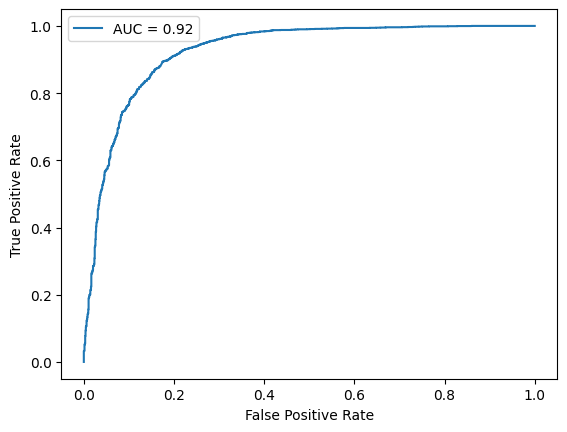

In [18]:
from sklearn.metrics import roc_curve, auc

y_proba = svm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [19]:
svm_model = SVC(class_weight='balanced')  # Ajusta pesos automaticamente
svm_model.fit(x_train, y_train)


SVC(class_weight='balanced')

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'class_weight': ['balanced', None]}
grid = GridSearchCV(LogisticRegression(), param_grid, scoring='f1', cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None]},
             scoring='f1')

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1323
         1.0       0.90      0.92      0.91      2481

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804



In [24]:
svm_model = SVC(class_weight='balanced', probability=True)  # Add probability=True
svm_model.fit(x_train, y_train)

SVC(class_weight='balanced', probability=True)

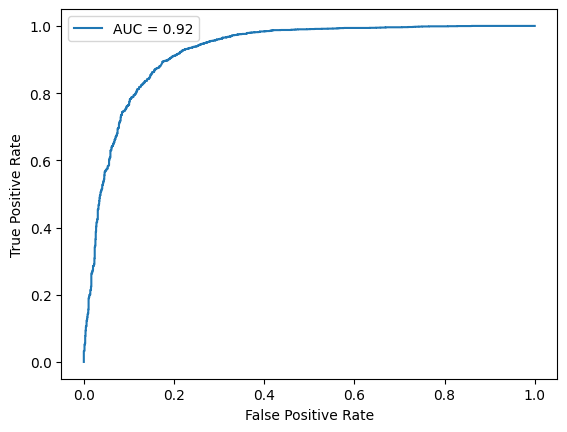

In [25]:
from sklearn.metrics import roc_curve, auc

y_proba = svm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(y_true, y_prob, threshold): # find accuracy for a given threshold
  y_pred = (y_prob > threshold).astype(int)
  accuracy = accuracy_score(y_true, y_pred)
  return accuracy

In [27]:
y_prob = svm_model.predict_proba(x_test)[:, 1]
threshold = 0.6
accuracy = calculate_accuracy(y_test, y_prob, threshold)
print(f"Acurácia para threshold {threshold}: {accuracy}")

Acurácia para threshold 0.6: 0.8470031545741324


In [29]:

best_val_ac= 0
val_ac=0
best_threshold=0

for threshold in [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]:
  calculate_accuracy(y_test, y_prob,threshold)
  val_ac=calculate_accuracy(y_test, y_prob,threshold)
  print(threshold,val_ac)
  if val_ac >= best_val_ac:
    best_val_ac=val_ac
    best_threshold=threshold
print('best threshold:', best_threshold, "roc_acc:", calculate_accuracy(y_test, y_prob,best_threshold))


0.1 0.8351735015772871
0.2 0.8667192429022083
0.3 0.8735541535226078
0.4 0.8746056782334385
0.5 0.8633017875920084
0.6 0.8470031545741324
0.7 0.8144058885383807
0.8 0.7460567823343849
0.9 0.5801787592008412
best threshold: 0.4 roc_acc: 0.8746056782334385


Now, let's find teh best hyperparameters and the best models for our data prediction

In [30]:
model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {'C': [0.1, 1, 10], 'class_weight': ['balanced', None]}
    },
    'SVC': {
        'model': SVC(),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
    }
}


In [32]:
best_models = []
for model_name, mp in model_params.items():
    print(f'Training {model_name}...')
    
    grid = GridSearchCV(mp['model'], mp['params'], scoring='f1', cv=5)
    grid.fit(x_train, y_train)
    
    best_models.append({
        'model': model_name,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'best_estimator': grid.best_estimator_
    })
print("done")

Treinando LogisticRegression...
Treinando SVC...
Treinando RandomForestClassifier...


In [33]:
# Imprima os melhores hiperparâmetros e pontuações para cada modelo
for result in best_models:
    print(f"Modelo: {result['model']}")
    print(f"Melhores hiperparâmetros: {result['best_params']}")
    print(f"Melhor F1-score: {result['best_score']:.4f}")
    print()

# Achar o melhor modelo
best_model_overall = max(best_models, key=lambda x: x['best_score'])
print(f"Melhor modelo geral: {best_model_overall['model']}")
print(f"Com F1-score de: {best_model_overall['best_score']:.4f}")


Modelo: LogisticRegression
Melhores hiperparâmetros: {'C': 0.1, 'class_weight': 'balanced'}
Melhor F1-score: 0.7802

Modelo: SVC
Melhores hiperparâmetros: {'C': 10, 'kernel': 'rbf'}
Melhor F1-score: 0.8631

Modelo: RandomForestClassifier
Melhores hiperparâmetros: {'max_depth': None, 'n_estimators': 100}
Melhor F1-score: 0.9283

Melhor modelo geral: RandomForestClassifier
Com F1-score de: 0.9283
